### Sentiment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import requests
from pprint import pprint
import uuid

sns.set()
%matplotlib inline

df = pd.read_csv('/Users/AF/Downloads/messages_meta.csv')
print(df)

### Filipino translation to English

In [62]:
from google.cloud.bigquery.client import Client
from google.cloud import translate

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/AF/Downloads/My First Project-c5893aa6ac2f.json'
bq_client = Client()

# -*- coding: utf-8 -*-

# translated = pd.read_csv(r'/Users/AF/Downloads/flat_list.csv', names=['text'])
translated = df['text'][0:100].values.tolist()


def translate_text():

    translate_client = translate.Client()
    result = translate_client.translate(translated, target_language='en')
    result = pd.DataFrame(result)
    result['input'].astype(str)
    result['translatedText'].astype(str)
    result['detectedSourceLanguage'].astype(str)
    return result


trans_list1 = translate_text()

In [63]:
# translated = pd.read_csv(r'/Users/AF/Downloads/flat_list.csv', names=['text'])
translated = df['text'][100:200].values.tolist()


def translate_text():

    translate_client = translate.Client()
    result = translate_client.translate(translated, target_language='en')
    result = pd.DataFrame(result)
    result['input'].astype(str)
    result['translatedText'].astype(str)
    result['detectedSourceLanguage'].astype(str)
    return result


trans_list2 = translate_text()

In [64]:
translated = df['text'][200:300].values.tolist()


def translate_text():

    translate_client = translate.Client()
    result = translate_client.translate(translated, target_language='en')
    result = pd.DataFrame(result)
    result['input'].astype(str)
    result['translatedText'].astype(str)
    result['detectedSourceLanguage'].astype(str)
    return result


trans_list3 = translate_text()

In [29]:
translated = df['text'][300:].values.tolist()


def translate_text():

    translate_client = translate.Client()
    result = translate_client.translate(translated, target_language='en')
    result = pd.DataFrame(result)
    result['input'].astype(str)
    result['translatedText'].astype(str)
    result['detectedSourceLanguage'].astype(str)
    return result


trans_list4 = translate_text()

In [65]:
trans_list = trans_list1.append(trans_list2)
translated = trans_list.append(trans_list3)
translated = translated.append(trans_list4)
translated = translated.reset_index()
print(translated)

     index   translatedText detectedSourceLanguage            input
0        0              ???                     en              ???
1        1  . pa order plss                     tl  . pa order plss
2        2                ]                     en                ]
3        3           3g6k9q                     en           3g6k9q
4        4           3jhqnk                     ar           3jhqnk
..     ...              ...                    ...              ...
396     96                👍                     en                👍
397     97                😊                     en                😊
398     98                😍                     en                😍
399     99               🙄🙄                     en               🙄🙄
400    100                😙                     en                😙

[401 rows x 4 columns]


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/AF/Downloads/messages_meta.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df.to_excel(writer, sheet_name='metadata')
translated.to_excel(writer, sheet_name='trans_list')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Sentiment 
- Selecting the translated words
- Converting to dataframe for modification
- Converting to dictionary

In [68]:
#Import libraries after installing the Google Language API: https://cloud.google.com/natural-language/docs/reference/libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import argparse
from google.cloud.bigquery.client import Client
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import emoji

sns.set()

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/AF/Downloads/My First Project-c5893aa6ac2f.json'
bq_client = Client()

# translated = pd.read_csv(r'/Users/AF/Downloads/translated.csv', names=['text'], encoding="ISO-8859-1")
# translated = translated[0:10]

def sentiment_list():

    sent_list = []

    for i, row in translated.iterrows():

        sent_dict = {}

        # uses the types.Document() function to perform analysis on the text and store it
        document = types.Document(
            content=translated['translatedText'][i],
            type=enums.Document.Type.PLAIN_TEXT)

        client = language.LanguageServiceClient()

        # Detects the sentiment of the text stored above
        sentiment = client.analyze_sentiment(document=document).document_sentiment

        # Assigns dictionary values for the URL, Title, Description, Sentiment, Magnitude, and Category

        sent_dict['text'] = translated.translatedText[i]
        sent_dict['language'] = translated.detectedSourceLanguage[i]
        sent_dict['input'] = translated.input[i]
        sent_dict['sentiment_score'] = sentiment.score
        sent_dict['magnitude'] = sentiment.magnitude
#         sent_dict['sender'] = translated.sender[i]
#         sent_dict['confidence'] = translated.confidence[i]
#         sent_dict['updated_at'] = translated.updated_at[i]
#         sent_dict['year_month'] = translated.year_month[i]
#         sent_dict['month'] = translated.month[i]
#         sent_dict['day'] = translated.day[i]
#         sent_dict['hour'] = translated.hour[i]
#         sent_dict['time'] = translated.time[i]
#         sent_dict['the_day'] = translated.the_day[i]

        # Appending the values in our dictionary to a list
        sent_list.append(sent_dict)

    return sent_list


sent_list = sentiment_list()
sent_list = pd.DataFrame(sent_list)

# A decimal number between -1 and 1 denoting the sentiment of the document.
# A score above 0.25 usually refers to a positive document while a score below
# -0.25 normally has a negative connotation. Mid values refer to neutral text.


def sentiment(row):
    if row['sentiment_score'] <= -0.25:
        return 'Negative'
    if -0.25 < row['sentiment_score'] <= 0.25:
        return 'Neutral'
    else:
        return 'Positive'


sent_list['sentiment'] = sent_list.apply(lambda row: sentiment(row), axis=1)

print(sent_list)

                text language            input  sentiment_score  magnitude  \
0                ???       en              ???              0.0        0.0   
1    . pa order plss       tl  . pa order plss              0.0        0.3   
2                  ]       en                ]              0.1        0.1   
3             3g6k9q       en           3g6k9q              0.0        0.0   
4             3jhqnk       ar           3jhqnk              0.0        0.0   
..               ...      ...              ...              ...        ...   
396                👍       en                👍              0.2        0.2   
397                😊       en                😊              0.3        0.3   
398                😍       en                😍              0.3        0.3   
399               🙄🙄       en               🙄🙄             -0.1        0.1   
400                😙       en                😙              0.3        0.3   

    sentiment  
0     Neutral  
1     Neutral  
2     Neutral  

In [72]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/AF/Downloads/Mcdo_sentiment.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
sent_list.to_excel(writer, sheet_name='sentiment')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### Question
#### What are the frequency of english and non-english words?

In [69]:
language_count = trans_list['detectedSourceLanguage'].value_counts()
language_count.rename({'af': 'Afrikaans', 'sq': 'Albanian', 'ar': 'Arabic', 'az': 'Azerbaijani', 'eu': 'Basque', 'bn': 'Bengali', 'be': 'Belarusian', 'bg':'Bulgarian', 'ca':'Catalan', 'zh-CN':'Chinese Simplified', 'zh-TW':'Chinese Traditional', 'hr':'Croatian', 'cs':'Czech', 'da':'Danish', 'nl':'Dutch', 'en':'English', 'eo':'Esperanto', 'et':'Estonian', 'tl':'Filipino', 'fi':'Finnish', 'fr':'French', 'gl':'Galician', 'ka':'Georgian',
              'el':'Greek', 'gu':'Gujarati', 'ht':'Haitian Creole', 'iw':'Hebrew', 'hi':'Hindi', 'hu':'Hungarian', 'is':'Icelandic', 'id':'Indonesian', 'ga':'Irish', 'it':'Italian', 'ja':'Japanese', 'kn':'Kannada', 'ko':'Korean', 'la':'Latin', 'lv':'Latvian', 'lt':'Lithuanian', 'mk':'Macedonian', 'ms':'Malay', 'mt':'Maltese', 'no':'Norwegian', 'fa':'Persian', 'pl':'Polish', 'pt':'Portuguese', 'ro':'Romanian', 'ru':'Russian', 
              'sr':'Serbian', 'sk':'Slovak', 'sl':'Slovenian', 'es':'Spanish', 'sw':'Swahili', 'sv':'Swedish', 'ta':'Tamil', 'te':'Telugu', 'th':'Thai', 'tr':'Turkish', 'uk':'Ukrainian', 'ur':'Urdu', 'vi':'Vietnamese', 'cy':'Welsh', 'yi':'Yiddish'}, inplace=True)

print(language_count)


English       146
Filipino       34
ceb             7
French          5
Arabic          3
Spanish         2
Indonesian      1
Japanese        1
Malay           1
Name: detectedSourceLanguage, dtype: int64


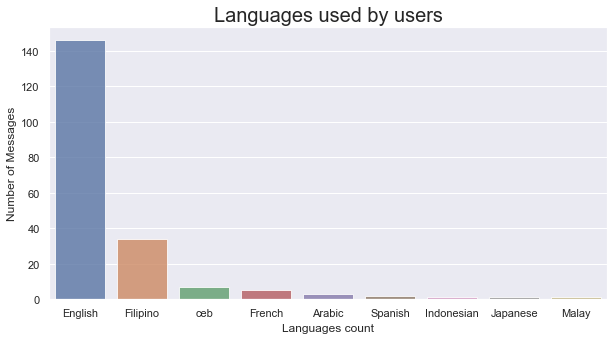

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(language_count.index, language_count.values, alpha=0.8)
plt.title('Languages used by users',fontsize=20)
plt.xlabel('Languages count', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)
plt.show()

### Sentiment frequency

Neutral     329
Negative     39
Positive     33
Name: sentiment, dtype: int64


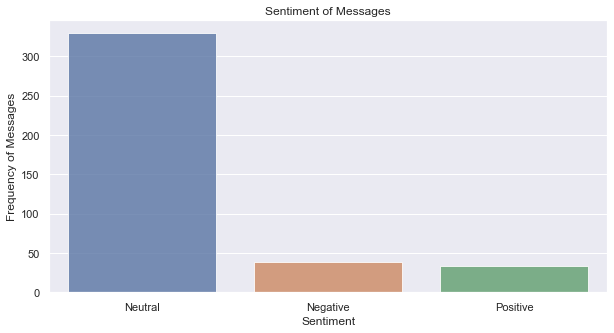

In [74]:
sent_count = sent_list['sentiment'].value_counts()
print(sent_count)

plt.figure(figsize=(10, 5))
sns.barplot(sent_count.index, sent_count.values, alpha=0.8)
plt.title('Sentiment of Messages')
plt.ylabel('Frequency of Messages')
plt.xlabel('Sentiment')
plt.show()

### Sentiment Analysis

In [1]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS

from subprocess import check_output

import os
import requests
from pprint import pprint
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uuid

sns.set()
%matplotlib inline

a = ['ng', 'nang', 'po', 'na', 'ba', 'sa','ko','hi', 'lang', 'nyo']
for c in a:
    STOPWORDS.add(c)

In [4]:
sent_list = pd.read_csv(r'/Users/AF/Downloads/Mcdo_sentiment.csv', encoding="ISO-8859-1")
# Splitting the dataset into train and test set
train, test = train_test_split(sent_list,test_size = 0.1)
# Removing neutral sentiments
train = sent_list[sent_list.sentiment != "Neutral"]

Positive words


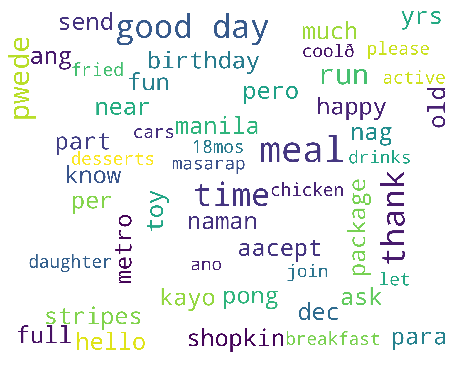

Negative words


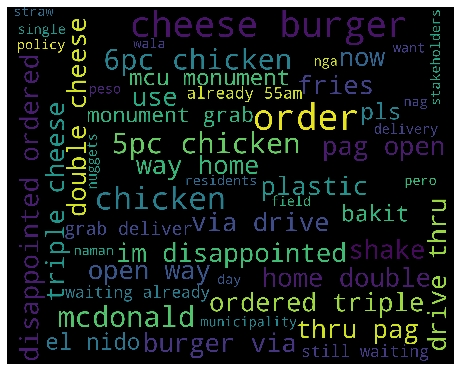

In [20]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['input']
train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['input']

def wordcloud_draw(train, color = 'black'):
    words = ' '.join(train)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      max_font_size=200,
                      max_words=50,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [6]:
from PIL import Image
burger_mask = np.array(Image.open("/Users/AF/Downloads/burger-and-soda.png"))
burger_mask
def transform_format(val):
    if np.any(val == 0):
        return 255
    else:
        return val
    
transformed_burger_mask = np.ndarray((burger_mask.shape[0],burger_mask.shape[1]), np.int32)

for i in range(len(burger_mask)):
    transformed_burger_mask[i] = list(map(transform_format, burger_mask[i]))
    
transformed_burger_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

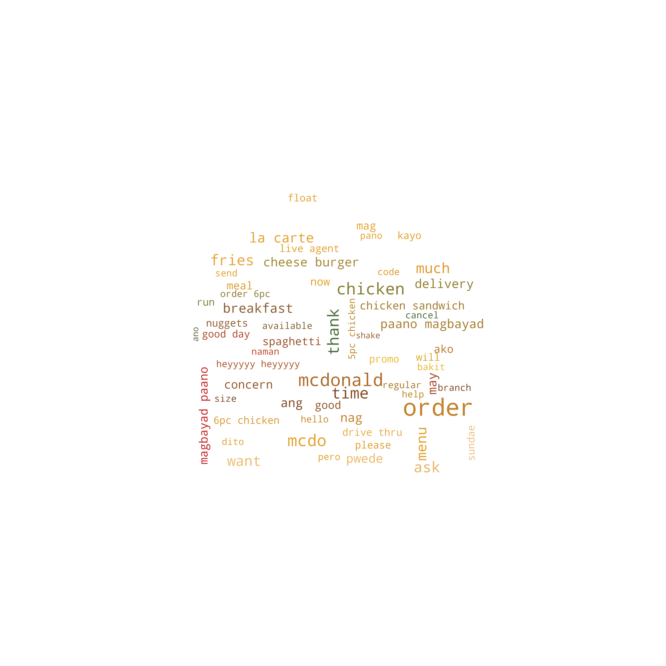

In [14]:
from wordcloud import ImageColorGenerator
text = sent_list['input']

# def wordcloud_draw(train):
#     words = ' '.join(train)
#     cleaned_word = " ".join([word for word in words.split()])

mask = np.array(Image.open("/Users/AF/Downloads/hamburger/25481.jpg"))
text = ' '.join(text)
text = " ".join([word for word in text.split()])
wordcloud_ita = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=60, mask=mask)
wordcloud_ita.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("/Users/AF/Downloads/burger.png", format="png")

In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import pandas as pd

# text = sent_list[sent_list['sentiment'] == 'Neutral']
# text = text['input']
# # Create and generate a word cloud image

# def show_wordcloud(data, title = None):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=STOPWORDS,
#         max_words=200, 
#         mask=transformed_burger_mask, 
#         contour_width=3, 
#         contour_color='firebrick',
#         max_font_size=5,
#         scale=3,
#         random_state=1 # chosen at random by flipping a coin; it was heads
#     ).generate(str(data))
    
#     wordcloud.to_file("/Users/AF/Downloads/burger.png")
#     fig = plt.figure(1, figsize=(20, 20))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
        
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.show()


# show_wordcloud(sent_list['text'])

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
cvec = CountVectorizer(stop_words=stopwords)
cvec.fit(sent_list.text)

/Users/AF/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'all', 'also', 'am', 'an', 'and', 'any', 'are',
                            "aren't", 'as', 'at', 'be', 'because', 'been',
                            'before', 'being', 'below', 'between', 'both',
                            'but', 'by', 'can', "can't", 'cannot', 'com', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [52]:
len(cvec.get_feature_names())

665

In [53]:
neg_doc_matrix = cvec.transform(sent_list[sent_list.sentiment == 'Negative'].text)
pos_doc_matrix = cvec.transform(sent_list[sent_list.sentiment == 'Positive'].text)
neu_doc_matrix = cvec.transform(sent_list[sent_list.sentiment == 'Neutral'].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neu_tf = np.sum(neu_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
neu = np.squeeze(np.asarray(neu_tf))
term_freq_df = pd.DataFrame([neg,pos,neu],columns=cvec.get_feature_names()).transpose()
print(term_freq_df)

             0  1  2
17           0  2  1
18mos        0  1  0
18th         0  0  1
1bff         0  0  1
1yr          0  0  1
...         .. .. ..
yrs          0  2  1
ysndphofscx  0  0  1
yun          0  0  1
yung         0  0  1
¹ï           0  0  1

[665 rows x 3 columns]


In [54]:
term_freq_df.columns = ['negative', 'positive', 'neutral']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive'] + term_freq_df['neutral']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]
print(term_freq_df)

             negative  positive  neutral  total
17                  0         2        1      3
18mos               0         1        0      1
18th                0         0        1      1
1bff                0         0        1      1
1yr                 0         0        1      1
...               ...       ...      ...    ...
yrs                 0         2        1      3
ysndphofscx         0         0        1      1
yun                 0         0        1      1
yung                0         0        1      1
¹ï                  0         0        1      1

[665 rows x 4 columns]


Text(0.5, 1.0, 'Top 20 tokens in messages')

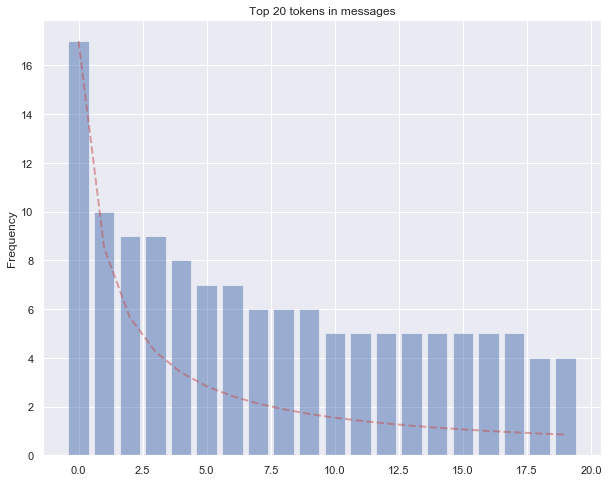

In [9]:
y_pos = np.arange(20)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:20], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 20 tokens in messages')

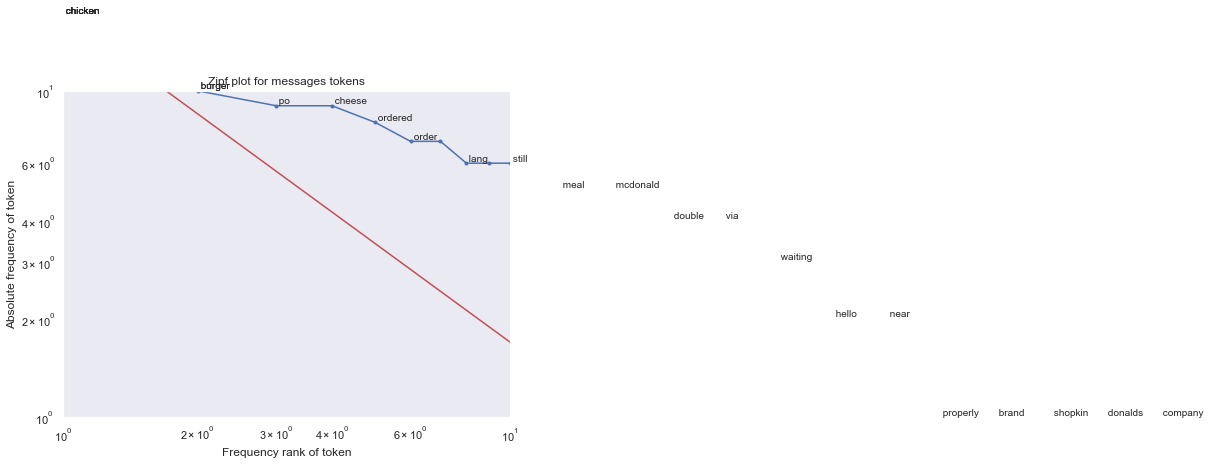

In [10]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**1)
plt.xlim(1,10**1)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for messages tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")


Text(0.5, 1.0, 'Top 20 tokens in negative messages')

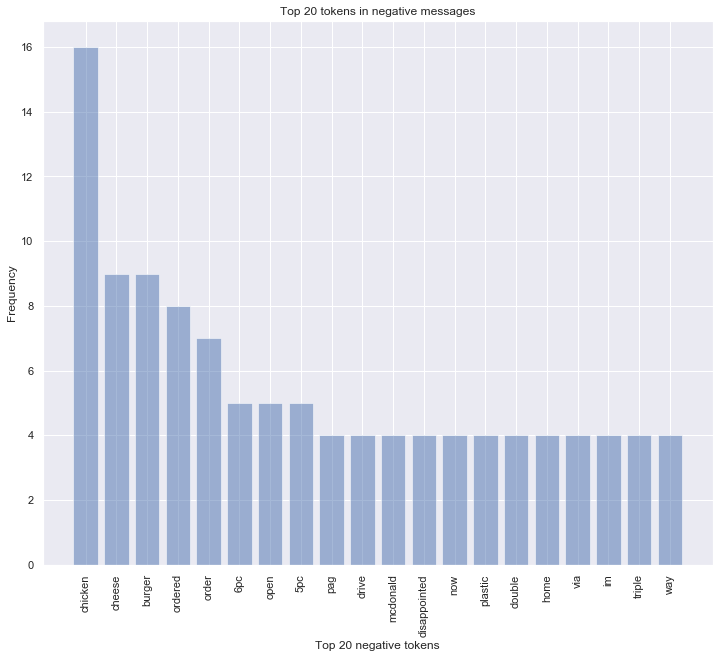

In [11]:
y_pos = np.arange(20)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 negative tokens')
plt.title('Top 20 tokens in negative messages')

Text(0.5, 1.0, 'Top 20 tokens in positive messages')

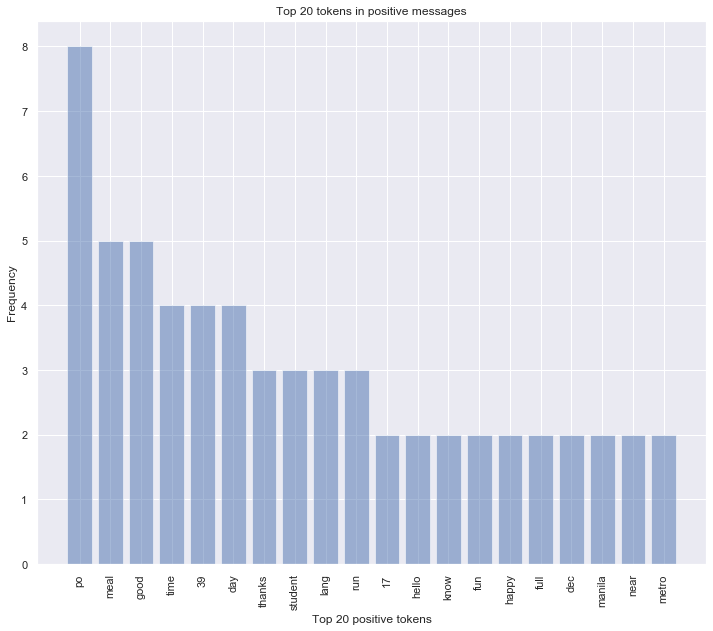

In [12]:
y_pos = np.arange(20)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 positive tokens')
plt.title('Top 20 tokens in positive messages')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

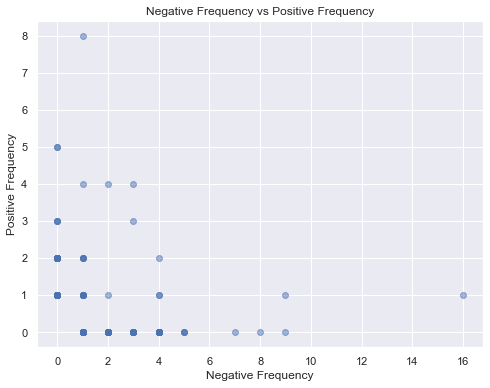

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [14]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
17,0,2,2,1.0
lem,0,1,1,1.0
hi,0,1,1,1.0
hm,0,1,1,1.0
indigenous,0,1,1,1.0
issa,0,1,1,1.0
join,0,1,1,1.0
ketkai,0,1,1,1.0
know,0,2,2,1.0
learning,0,1,1,1.0


In [15]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
po,1,8,9,0.888889,0.041026
meal,0,5,5,1.000000,0.025641
good,0,5,5,1.000000,0.025641
time,1,4,5,0.800000,0.020513
39,3,4,7,0.571429,0.020513
day,2,4,6,0.666667,0.020513
thanks,0,3,3,1.000000,0.015385
student,0,3,3,1.000000,0.015385
lang,3,3,6,0.500000,0.015385
run,0,3,3,1.000000,0.015385


In [16]:
from scipy.stats import hmean

term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)                                                        
term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
po,1,8,9,0.888889,0.041026,0.078431
meal,0,5,5,1.000000,0.025641,0.050000
good,0,5,5,1.000000,0.025641,0.050000
time,1,4,5,0.800000,0.020513,0.040000
day,2,4,6,0.666667,0.020513,0.039801
39,3,4,7,0.571429,0.020513,0.039604
run,0,3,3,1.000000,0.015385,0.030303
thanks,0,3,3,1.000000,0.015385,0.030303
student,0,3,3,1.000000,0.015385,0.030303
lang,3,3,6,0.500000,0.015385,0.029851


In [17]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
good,0,5,5,1.000000,0.025641,0.050000,0.874251,0.999997,0.932906
meal,0,5,5,1.000000,0.025641,0.050000,0.874251,0.999997,0.932906
thanks,0,3,3,1.000000,0.015385,0.030303,0.874251,0.992188,0.929493
student,0,3,3,1.000000,0.015385,0.030303,0.874251,0.992188,0.929493
run,0,3,3,1.000000,0.015385,0.030303,0.874251,0.992188,0.929493
po,1,8,9,0.888889,0.041026,0.078431,0.820218,1.000000,0.901230
17,0,2,2,1.000000,0.010256,0.020305,0.874251,0.915716,0.894503
manila,0,2,2,1.000000,0.010256,0.020305,0.874251,0.915716,0.894503
children,0,2,2,1.000000,0.010256,0.020305,0.874251,0.915716,0.894503
dec,0,2,2,1.000000,0.010256,0.020305,0.874251,0.915716,0.894503


In [18]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
cheese,9,0,9,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.028302,0.055046,0.823295,0.999998,0.903084
ordered,8,0,8,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.025157,0.049080,0.823295,0.999977,0.903076
order,7,0,7,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.022013,0.043077,0.823295,0.999755,0.902985
5pc,5,0,5,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.015723,0.030960,0.823295,0.989377,0.898728
6pc,5,0,5,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.015723,0.030960,0.823295,0.989377,0.898728
open,5,0,5,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.015723,0.030960,0.823295,0.989377,0.898728
via,4,0,4,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.012579,0.024845,0.823295,0.956578,0.884946
plastic,4,0,4,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.012579,0.024845,0.823295,0.956578,0.884946
thru,4,0,4,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.012579,0.024845,0.823295,0.956578,0.884946
now,4,0,4,0.0,0.0,0.0,0.176705,0.240508,0.203728,1.0,0.012579,0.024845,0.823295,0.956578,0.884946


In [55]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('/Users/AF/Downloads/Mcwords.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
term_freq_df.to_excel(writer, sheet_name='term frequency')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

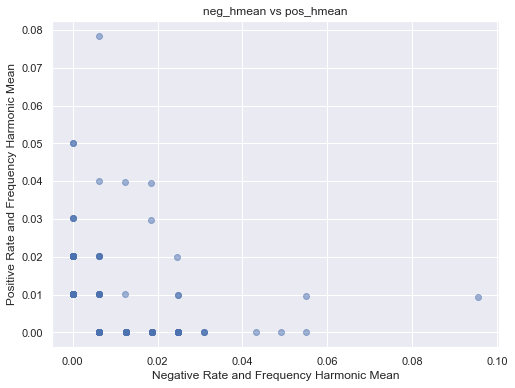

In [19]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

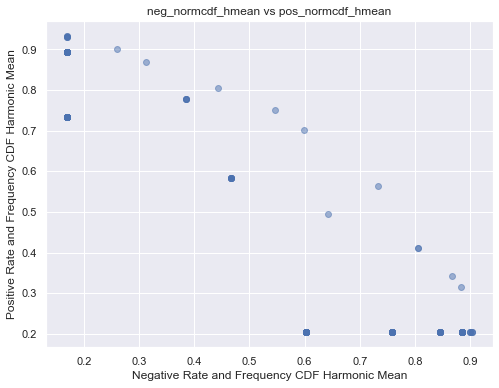

In [20]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [23]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df.pos_normcdf_hmean), high=max(term_freq_df.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...